In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df.head

<bound method NDFrame.head of       invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19  

# Preprocessing

In [5]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst = True)

In [6]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [7]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [8]:
df['sales'] = df['price']

In [9]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1500.40
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1800.51
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,3000.85
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,60.60
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,58.65
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,10.46
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,10.46
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,4200.00


In [11]:
monthly_sales = df.resample('ME', on = 'invoice_date')['sales'].sum()

In [12]:
monthly_sales.head()

invoice_date
2021-01-31    2656422.78
2021-02-28    2358636.34
2021-03-31    2618434.14
2021-04-30    2558825.62
2021-05-31    2662369.93
Freq: ME, Name: sales, dtype: float64

# EDA

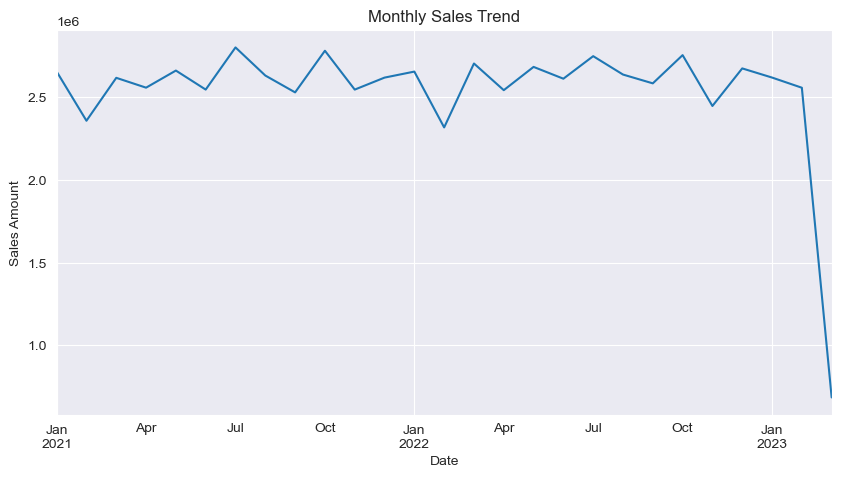

In [15]:
plt.figure(figsize = (10, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.show()

### Category wise sales

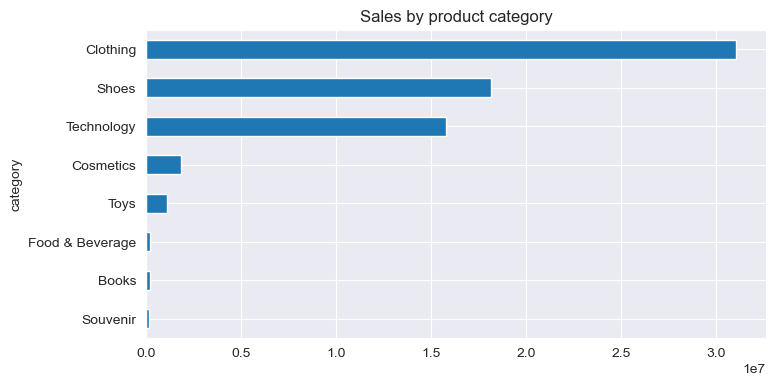

In [17]:
category_sales = df.groupby('category')['sales'].sum().sort_values()
category_sales.plot(kind = 'barh', figsize = (8, 4))
plt.title("Sales by product category")
plt.show()

### Mall wise sales

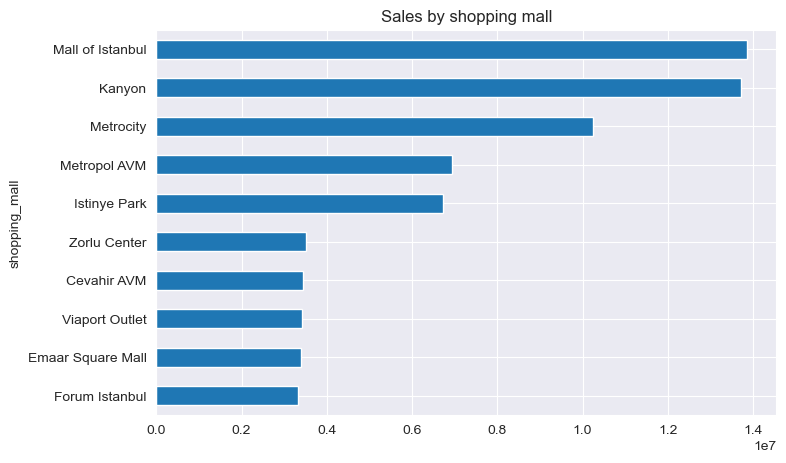

In [19]:
mall_sales = df.groupby('shopping_mall')['sales'].sum().sort_values()
mall_sales.plot(kind = 'barh', figsize = (8, 5))
plt.title("Sales by shopping mall")
plt.show()

### Monthly Seasonality

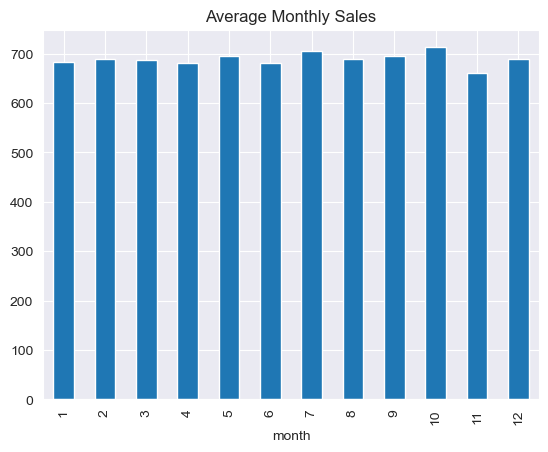

In [20]:
df['month'] = df['invoice_date'].dt.month
df.groupby('month')['sales'].mean().plot(kind = 'bar')
plt.title("Average Monthly Sales")
plt.show()
           

# Prophet

In [22]:
# installing the prophet package
!pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.1 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/12.1 MB 2.3 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.1 MB 2.4 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/12.1 MB 2.4 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/12.1 MB 2.4 MB/s eta 0:00:04
   ----------- ---------------------------- 3.4/12.1 MB 2.4 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.1 MB 2.4 MB/s eta 0:00:04
   -------------- ------------------------- 4.5/12.1 MB 2.4 MB/s eta 0:00:04
   ---------------- ----------------------- 5.0/12.1 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 5.5/12.1 MB 2.4 MB/s eta 0:00:03
   ------------------- -------------------- 6.0/12.1 MB 2.4 MB/s eta 0:00:03
   ----------

In [26]:
from prophet import Prophet

In [28]:
prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']

In [29]:
model = Prophet()
model.fit(prophet_df)

22:31:20 - cmdstanpy - INFO - Chain [1] start processing
22:31:22 - cmdstanpy - INFO - Chain [1] done processing


# Next six months forecast prediction 

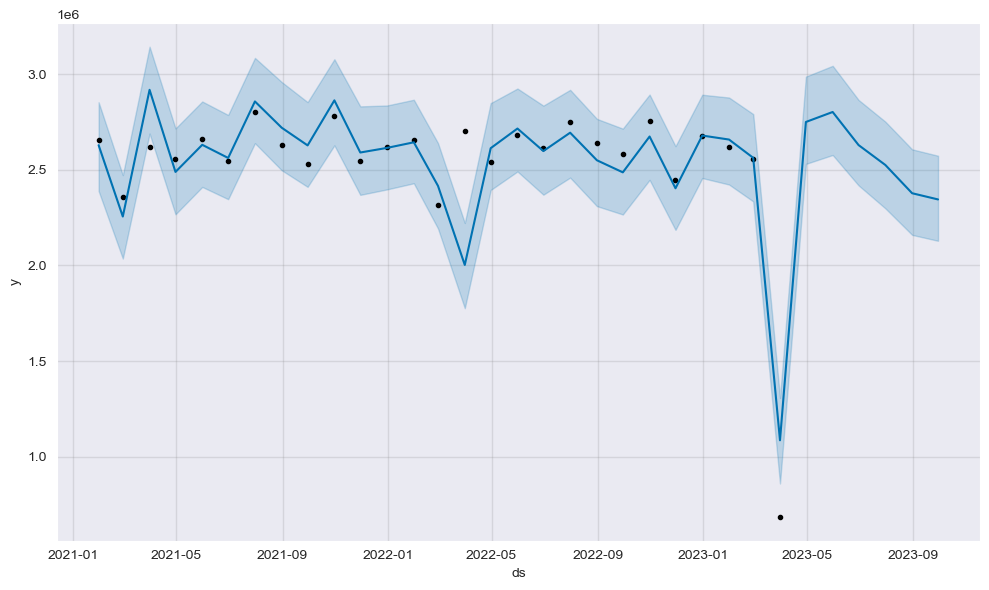

In [30]:
future = model.make_future_dataframe(periods = 6, freq = 'ME')
forecast = model.predict(future)
model.plot(forecast)
plt.show()

In [31]:
train = prophet_df[:-6]
test = prophet_df[-6:]

In [32]:
model = Prophet()
model.fit(train)

22:33:42 - cmdstanpy - INFO - Chain [1] start processing
22:33:42 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = model.make_future_dataframe(periods = 6, freq = 'ME')
forecast = model.predict(future)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_true = test['y'].values
y_pred = forecast['yhat'][-6:].values
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae, rmse

(405378.69556236244, np.float64(810834.8339150872))

In [36]:
print("MAE :", mae)
print("RMSE:", rmse)

MAE : 405378.69556236244
RMSE: 810834.8339150872


# Business Insights : 
* Clothing and Shoes generate maximum revenue
* Certain malls outperform others consistently
* Sales show monthly seasonality
* Forecast predicts increasing demand in next 6 months
* Inventory should be increased for high-demand categories

In [37]:
df.to_csv("clean_sales_data.csv", index = False)

In [38]:
forecast_export = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_export.to_csv("sales_forecast.csv", index = False)